# Mapping in Python with `geopandas`

In [46]:
%matplotlib inline

import matplotlib.pyplot as plt
import geopandas as gpd

In this lab, we will learn how to load, manipulate and visualize spatial data. In some senses, spatial data have become so pervasive that nowadays, they are usually included simply as "one more column" in a table. However, *spatial is special* and there are few aspects in which geographic data differ from standard numerical tables. In this session, we will extend the skills developed in the previous one about non-spatial data, and combine them. In the process, we will discover that, although with some particularities, dealing with spatial data in Python largely resembles dealing with non-spatial data.

To learn these concepts, we will be playing again with the geography of Liverpool. In particular we will use Census geographies and Ordnance Survey geospatial data, available to download also from the CDRC data store (link). To make the rest of the notebook easier to follow, let us set the paths to the main two folders here. We will call the path to the Liverpool Census pack `lcp_dir`, and that to the OS geodata `los_dir`:

In [55]:
lcp_dir = '/media/dani/baul/AAA/Documents/teaching/u-lvl/2015/geocomp/data/Liverpool/'
los_dir = '../E08000012/'

## Loading up spatial data

The easiest way to get from a file to a quick visualization of the data is by loading it as a `GeoDataFrame` and calling the `plot` command. The main library employed for all of this is `geopandas` which is a geospatial extension of the `pandas` library, already introduced before. `geopandas` supports exactly the same functionality that `pandas` does (in fact since it is built on top of it, so most of the underlying machinery is pure `pandas`), plus a wide range of spatial counterparts that make manipulation and general "munging" of spatial data as easy as non-spatial tables.

In two lines of code, we will obtain a graphical representation of the spatial data contained in a file that can be in many formats; actually, since it uses the same drivers under the hood, you can load pretty much the same kind of vector files that QGIS permits. Let us start by plotting single layers in a crude but quick form, and we will build style and sophistication into our plots later on.

* Polygons

Let us begin with the most common type of spatial data in the social science: polygons. For example, we can load the geography of LSOAs in Liverpool with the following lines of code:

In [56]:
lsoas_link = lcp_dir + 'shapefiles/Liverpool_lsoa11.shp'
lsoas = gpd.read_file(lsoas_link)

Now `lsoas` is a `GeoDataFrame`. Very similar to a traditional, non-spatial `DataFrame`, but with an additional column called `geometry`:

In [57]:
lsoas.head()

,LSOA11CD,geometry
0,E01006512,"POLYGON ((336103.358 389628.58, 336103.416 389..."
1,E01006513,"POLYGON ((335173.781 389691.538, 335169.798 38..."
2,E01006514,"POLYGON ((335495.676 389697.267, 335495.444 38..."
3,E01006515,"POLYGON ((334953.001 389029, 334951 389035, 33..."
4,E01006518,"POLYGON ((335354.015 388601.947, 335354 388602..."


This allows us to quickly produce a plot by executing the following line:

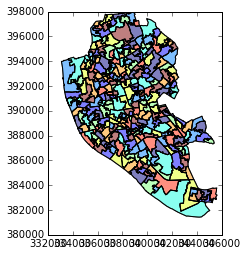

In [58]:
lsoas.plot()

This might not be the most aesthetically pleasant visual representation of the LSOAs geography, but it is hard to argue it is not quick to produce. We will work on styling and customizing spatial plots later on.

**Pro-tip**: if you call a single row of the `geometry` column, it'll return a small plot ith the shape:

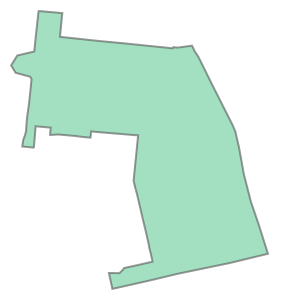

In [63]:
lsoas.loc[0, 'geometry']

* Lines

Displaying lines is as straight-forward as polygons. To load railway tunnels in Liverpool:

In [81]:
rwy_tun = gpd.read_file(los_dir + 'RailwayTunnel.shp')\
             .set_index('id')
rwy_tun.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 44 entries, 0ACD196C321E4F8DE050A00A568A6F6F to 0ACD196C313D4F8DE050A00A568A6F6F
Data columns (total 2 columns):
featcode    44 non-null float64
geometry    44 non-null object
dtypes: float64(1), object(1)
memory usage: 1.0+ KB


Note how we have also indexed the table on the `id` column.

A quick plot is similarly generated by (mind that because there are over 18,000 segments, this may take a little bit):

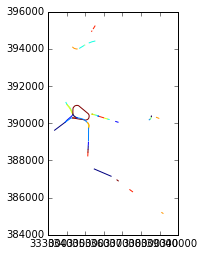

In [67]:
rwy_tun.plot()

Again, this is not the prettiest way to display the roads maybe, and you might want to change a few parameters such as colors, etc. All of this is possible, as we will see below, but this gives us an easy check of what lines look like.

---

**[In-class exercise]**

Obtain the graphical representation of the line with `id` = `0ACD196C32214F8DE050A00A568A6F6F`.

---

* Points

Finally, points follow a similar structure. If we want to represent named places in Liverpool:

In [83]:
namp = gpd.read_file(los_dir + 'NamedPlace.shp')
namp.head()

,classifica,distname,featcode,fontheight,geometry,htmlname,id,orientatio
0,Hydrography,Sugar Brook,15804,Small,POINT (339605 396261),Sugar Brook,0EE7A103C03A8FBFE050A00A568A2502,25
1,Landcover,Sandfield Park,15805,Small,POINT (339758 392357),Sandfield Park,0EE7A104A4B68FBFE050A00A568A2502,0
2,Populated Place,Sandfield Park,15801,Medium,POINT (339768 392217),Sandfield Park,0EE7A1041DB18FBFE050A00A568A2502,0
3,Populated Place,Gillmoss,15801,Medium,POINT (340269 396567),Gillmoss,0EE7A1041DE48FBFE050A00A568A2502,0
4,Populated Place,Croxteth,15801,Medium,POINT (340296 395304),Croxteth,0EE7A1041DE58FBFE050A00A568A2502,0


And the plot is produced by running:

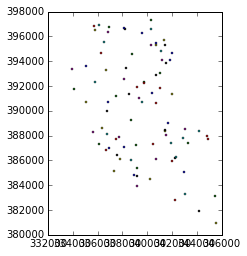

In [84]:
namp.plot()

## Styling plots

* Changing transparency

* Removing axes

* Removing borders

* Choosing different colors

* Transforming CRS

## Composing multi-layer maps

* Build a map

* Save it into an image

## Manipulating spatial tables (`GeoDataFrames`)

### Non-spatial manipulations

### Spatial manipulations

* Centroid calculation

* Point in polygon (PiP)

* Spatial joins

* Spatial aggregations

* Buffers

## `[Extension I]` Advanced cartography with `cartopy`

## `[Extension II]` Adding base layers from satelite imagery

---

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Geographic Data Science'15 - Lab 1</span> by <a xmlns:cc="http://creativecommons.org/ns#" href="http://darribas.org" property="cc:attributionName" rel="cc:attributionURL">Dani Arribas-Bel</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

